TP1 : Logique Floue

In [2]:
!pip install scikit-fuzzy


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Exercice1

In [4]:
Distance_to_next = ctrl.Antecedent(np.arange(0,30), 'Distance_to_next')

In [5]:
# Définition des ensembles flous pour Distance_to_next
Distance_to_next['v_small'] = fuzz.trapmf(Distance_to_next.universe, [0, 0, 3, 5])
Distance_to_next['small'] = fuzz.trimf(Distance_to_next.universe, [0, 5, 10]) 
Distance_to_next['perfect'] = fuzz.trimf(Distance_to_next.universe, [5, 10, 15])
Distance_to_next['big'] = fuzz.trimf(Distance_to_next.universe, [10, 15, 25])
Distance_to_next['v_big'] = fuzz.trapmf(Distance_to_next.universe, [20, 25, 30, 30])

c:\Users\RPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


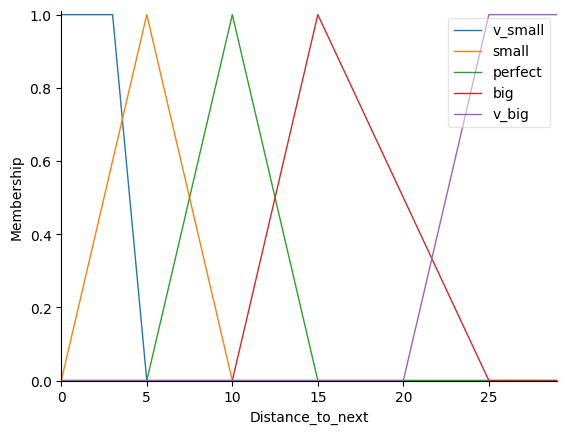

In [6]:
#Visualiser les fonctions d apprartenance
Distance_to_next.view()

Exercice2

In [7]:
Speed_Change = ctrl.Antecedent(np.arange(-20,20), 'Speed_Change')

In [8]:
Speed_Change['declining'] = fuzz.trimf(Speed_Change.universe, [-20, -15, -5])
Speed_Change['constant']= fuzz.trapmf(Speed_Change.universe, [-10, -5, 5, 10])
Speed_Change['growing'] = fuzz.trimf(Speed_Change.universe, [5, 15, 20])

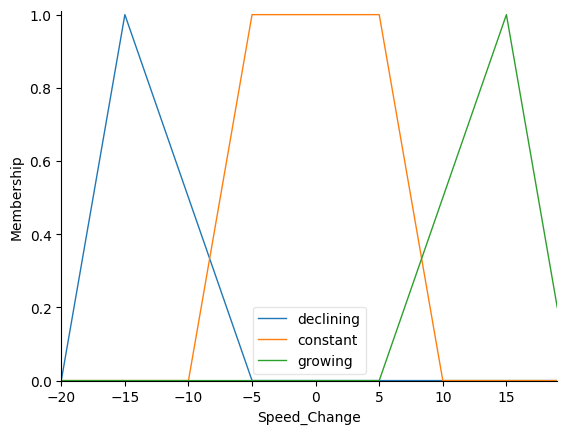

In [9]:
Speed_Change.view()

Exercice3

In [10]:
Acceleration_Adjust = ctrl.Consequent(np.arange(-3,3), 'Acceleration_Adjust')

In [11]:
Acceleration_Adjust['neg_big']= fuzz.trapmf(Acceleration_Adjust.universe, [-3, -3, -2, -1])
Acceleration_Adjust['neg_small']= fuzz.trimf(Acceleration_Adjust.universe, [-2, -1, 0])
Acceleration_Adjust['zero']= fuzz.trimf(Acceleration_Adjust.universe, [-1, 0, 1])
Acceleration_Adjust['pos_small']= fuzz.trimf(Acceleration_Adjust.universe, [0, 1, 2])
Acceleration_Adjust['pos_big']= fuzz.trapmf(Acceleration_Adjust.universe, [1, 2, 3, 3])

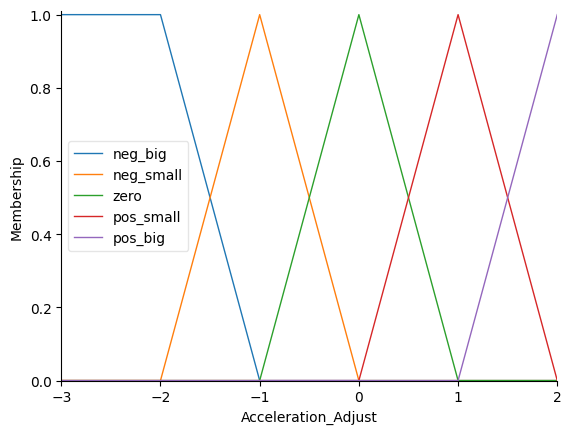

In [12]:
Acceleration_Adjust.view()

Exercice4

In [13]:
#Implementation Des Regles
rule1 = ctrl.Rule(Distance_to_next['v_small'] & Speed_Change['declining'], Acceleration_Adjust['neg_small'])
rule2 = ctrl.Rule(Distance_to_next['v_small'] & Speed_Change['constant'], Acceleration_Adjust['neg_big'])
rule3 = ctrl.Rule(Distance_to_next['v_small'] & Speed_Change['growing'], Acceleration_Adjust['neg_big'])
rule4= ctrl.Rule(Distance_to_next['small'] & Speed_Change['declining'], Acceleration_Adjust['zero'])
rule5= ctrl.Rule(Distance_to_next['small'] & Speed_Change['constant'], Acceleration_Adjust['neg_small'])
rule6= ctrl.Rule(Distance_to_next['small'] & Speed_Change['growing'], Acceleration_Adjust['neg_big'])
rule7= ctrl.Rule(Distance_to_next['perfect'] & Speed_Change['declining'], Acceleration_Adjust['pos_small'])
rule8= ctrl.Rule(Distance_to_next['perfect'] & Speed_Change['constant'], Acceleration_Adjust['zero'])
rule9= ctrl.Rule(Distance_to_next['perfect'] & Speed_Change['growing'], Acceleration_Adjust['neg_small'])
rule10= ctrl.Rule(Distance_to_next['big'] & Speed_Change['declining'], Acceleration_Adjust['pos_big'])
rule11= ctrl.Rule(Distance_to_next['big'] & Speed_Change['constant'], Acceleration_Adjust['pos_small'])
rule12= ctrl.Rule(Distance_to_next['big'] & Speed_Change['growing'], Acceleration_Adjust['zero'])
rule13= ctrl.Rule(Distance_to_next['v_big'] & Speed_Change['declining'], Acceleration_Adjust['pos_big'])
rule14= ctrl.Rule(Distance_to_next['v_big'] & Speed_Change['constant'], Acceleration_Adjust['pos_big'])
rule15= ctrl.Rule(Distance_to_next['v_big'] & Speed_Change['growing'], Acceleration_Adjust['pos_small'])

In [14]:
#Simulation du fctnememnt
acceleration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
acceleration_simulation = ctrl.ControlSystemSimulation(acceleration_ctrl)
acceleration_simulation.method = 'centoid'

acceleration_simulation.input['Distance_to_next'] = 13
acceleration_simulation.input['Speed_Change'] = -2.5
acceleration_simulation.compute()

In [15]:
print(acceleration_simulation.output['Acceleration_Adjust'])

0.5729166666666667


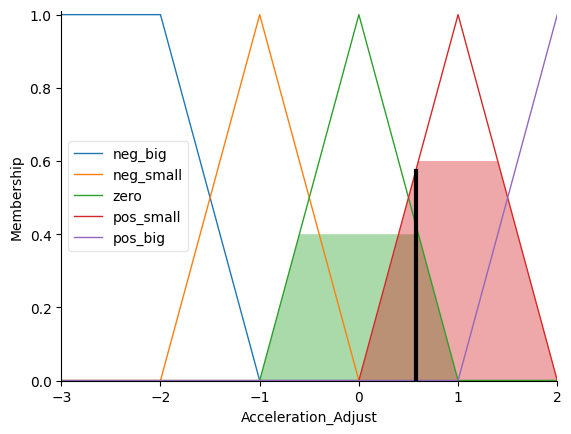

In [16]:
#Visualisation le resultat de defuzzification
Acceleration_Adjust.view(sim=acceleration_simulation)

TP2 : Logique Floue

In [17]:
# Génération d'un dataset synthétique
import pandas as pd
np.random.seed(42)  
distance_values = np.random.uniform(0, 30, 1000)
speed_change_values = np.random.uniform(-20, 20, 1000)
acceleration_outputs = []
for dist, speed in zip(distance_values, speed_change_values):
    acceleration_simulation.input['Distance_to_next'] = dist
    acceleration_simulation.input['Speed_Change'] = speed
    acceleration_simulation.compute()
    acceleration_outputs.append(acceleration_simulation.output['Acceleration_Adjust'])

dataset = pd.DataFrame({
    'Distance_to_next': distance_values,
    'Speed_change': speed_change_values,
    'Acceleration_Adjust': acceleration_outputs
})

In [18]:
dataset.head()

,Distance_to_next,Speed_change,Acceleration_Adjust
0,11.236204,-12.594683,1.067550
1,28.521429,1.676038,1.666667
2,21.959818,14.917833,0.556726
3,17.959755,9.288995,0.262658
4,4.680559,12.262446,-2.168135


In [19]:
X=dataset[['Distance_to_next', 'Speed_change']]
y=dataset['Acceleration_Adjust']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
#MAE
from sklearn.metrics import mean_absolute_error , mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: ',mae)
#MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE: ',mse)

MAE:  0.3383386264598343
MSE:  0.17044877926615676


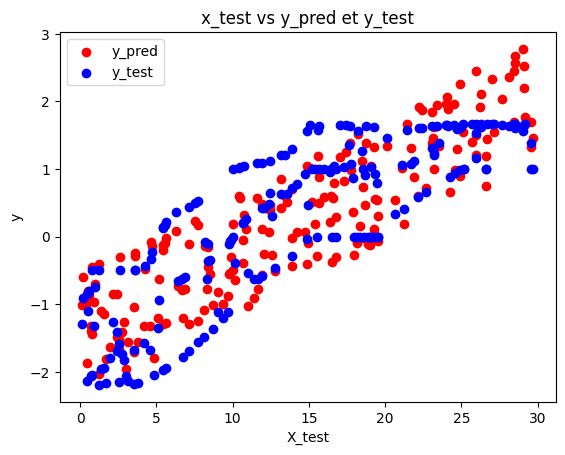

In [24]:
#Visualiser x_test vs ypred et y_test
import matplotlib.pyplot as plt

plt.scatter(X_test['Distance_to_next'], y_pred, label='y_pred',color='r')
plt.scatter(X_test['Distance_to_next'], y_test, label='y_test',color='b')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('x_test vs y_pred et y_test')
plt.legend()
plt.show()
